In [0]:
import pandas as pd

In [0]:
employment_stats = pd.read_csv ("amcatData.csv")

In [30]:
employment_stats.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [31]:
employment_stats.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [32]:
non_numeric_cols = []
for column in employment_stats.columns:
  if (employment_stats [column].dtype == 'object'):
    non_numeric_cols.append (column)
    print("{:15}{:15}".format(column,(employment_stats.groupby(column).size()).shape[0]))

DOJ                         81
DOL                         67
Designation                419
JobCity                    339
Gender                       2
DOB                       1872
10board                    275
12board                    340
Degree                       4
Specialization              46
CollegeState                26


In [33]:
print(non_numeric_cols)
employment_stats = employment_stats.drop ("DOB", axis = 1)
employment_stats = employment_stats.drop ("DOL", axis = 1)
employment_stats = employment_stats.drop("ID", axis = 1)
employment_stats = employment_stats.drop("Designation", axis = 1)
employment_stats = employment_stats.drop("DOJ", axis = 1)
non_numeric_cols.remove("DOB")
non_numeric_cols.remove("DOL")
non_numeric_cols.remove("DOJ")
non_numeric_cols.remove("Designation")


['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


In [0]:
description_table = employment_stats.describe()

In [0]:
employment_stats["TechnicalScore"] = 0
employment_stats["TechnicalStrengthCount"] = 0
employment_stats["MajorTechnicalSubject"] = ""

In [0]:
technical_subjects = ["ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"]
for index, row in employment_stats.iterrows():
  technical_score = [row["ComputerProgramming"], row["ElectronicsAndSemicon"], row["ComputerScience"], row["MechanicalEngg"], row["ElectricalEngg"], row["TelecomEngg"], row["CivilEngg"]]
  employment_stats.at[index, "TechnicalScore"] = max(technical_score)
  employment_stats.at[index, "TechnicalStrengthCount"] = sum(x > 0 for x in technical_score)
  employment_stats.at[index, "MajorTechnicalSubject"] = technical_subjects[technical_score.index(max(technical_score))]
  

In [0]:
employment_stats = employment_stats.drop("Specialization", axis = 1)
employment_stats = employment_stats.drop("ComputerScience", axis = 1)
employment_stats = employment_stats.drop("ComputerProgramming", axis = 1)
employment_stats = employment_stats.drop("ElectronicsAndSemicon", axis = 1)
employment_stats = employment_stats.drop("MechanicalEngg", axis = 1)
employment_stats = employment_stats.drop("ElectricalEngg", axis = 1)
employment_stats = employment_stats.drop("TelecomEngg", axis = 1)
employment_stats = employment_stats.drop("CivilEngg", axis = 1)
non_numeric_cols.remove("Specialization")

In [0]:
IT_CITY = 1
NON_IT_CITY = 2
it_hubs = ["bangalore", "gurgaon", "noida", "pune", "mumbai", "delhi", "new delhi", "navi mumbai", "hyderabad", "ncr", "chennai"]
for index,row in employment_stats.iterrows():
  if row["JobCity"].lower() in it_hubs:
    employment_stats.at[index, "JobCity"] = IT_CITY
  else:
    employment_stats.at[index, "JobCity"] = NON_IT_CITY
non_numeric_cols.remove("JobCity")

In [39]:
employment_stats.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'TechnicalScore',
       'TechnicalStrengthCount', 'MajorTechnicalSubject'],
      dtype='object')

In [0]:
CBSE = 1
ICSE = 2
STATE_BOARD = 3
UNAVAILABLE = 4
for index, row in employment_stats.iterrows():
  if row["10board"].lower() == "cbse" or row["10board"].lower() == "central board of secondary education":
    employment_stats.at[index, "10board"] = CBSE
  elif row["10board"].lower() == "icse" or row["10board"].lower() == "isc":
    employment_stats.at[index, "10board"] = ICSE
  elif row["10board"] == '':
    employment_stats.at[index, "10board"] = UNAVAILABLE
  else:
    employment_stats.at[index, "10board"] = STATE_BOARD
  if row["12board"].lower() == "cbse" or row["12board"].lower() == "central board of secondary education":
    employment_stats.at[index, "12board"] = CBSE
  elif row["12board"].lower() == "icse" or row["12board"].lower() == "isc":
    employment_stats.at[index, "12board"] = ICSE
  elif row["12board"] == '':
    employment_stats.at[index, "12board"] = UNAVAILABLE
  else:
    employment_stats.at[index, "12board"] = STATE_BOARD

In [0]:
non_numeric_cols.remove("10board")
non_numeric_cols.remove("12board")

In [42]:
employment_stats.groupby("Degree").size()

Degree
B.Tech/B.E.      3700
M.Sc. (Tech.)       2
M.Tech./M.E.       53
MCA               243
dtype: int64

In [0]:
employment_stats = employment_stats[employment_stats["Degree"] != "M.Sc. (Tech.)"]

In [44]:
xlate_dict = {}
for col_name in employment_stats.columns:
    if(employment_stats[col_name].dtype == 'object'):
        print(col_name)
        employment_stats[col_name]= employment_stats[col_name].astype('category')
        equivalent = employment_stats[col_name].cat.codes
        xlate_dict [employment_stats [col_name]] = equivalent
        employment_stats[col_name] = equivalent

JobCity
Gender
10board
12board
Degree
CollegeState
MajorTechnicalSubject


In [45]:
minOutliers = []
maxOutliers = []
outlierFeatures = []
descriptionTable = employment_stats.describe()
for i in employment_stats.columns:
  if i != 'Salary':
    if(descriptionTable[i][6] != descriptionTable[i][4]):
      outlierFeatures.append(i)
      interQuartile = ((descriptionTable[i][6] - descriptionTable[i][4]) * 1.5)
      minOutliers.append((descriptionTable[i][4]) - interQuartile)
      maxOutliers.append((descriptionTable[i][6]) + interQuartile)
print(outlierFeatures)

['JobCity', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'TechnicalScore', 'TechnicalStrengthCount', 'MajorTechnicalSubject']


In [46]:
for i in range(len(outlierFeatures)):
    employment_stats = employment_stats [employment_stats [outlierFeatures[i]] >= minOutliers[i]]
    employment_stats = employment_stats [employment_stats [outlierFeatures[i]] <= maxOutliers[i]]
    print(outlierFeatures[i], minOutliers[i], maxOutliers[i])

JobCity -1.5 2.5
10percentage 50.65125 106.70125000000002
10board -3.0 5.0
12graduation 2004.0 2012.0
12percentage 41.10000000000001 107.49999999999999
12board -3.0 5.0
CollegeID -11992.0 21304.0
collegeGPA 51.51625000000003 91.20624999999997
CollegeCityID -11992.0 21304.0
CollegeCityTier -1.5 2.5
CollegeState -7.0 41.0
GraduationYear 2009.0 2017.0
English 207.5 787.5
Logical 265.0 745.0
Quant 182.5 842.5
Domain -0.4075852329999999 1.5921484549999998
conscientiousness -2.87005 2.84635
agreeableness -1.93695 2.46265
extraversion -2.5200000000000005 2.5872
nueroticism -2.9598 2.6178
openess_to_experience -2.4266 2.2598000000000003
TechnicalScore 180.0 700.0
TechnicalStrengthCount -0.5 3.5
MajorTechnicalSubject -2.0 6.0


In [47]:
employment_stats.shape

(3359, 28)

In [48]:
BELOW_AVG_SALARY = 0
ABOVE_AVG_SALARY = 1
for index,row in employment_stats.iterrows():
  if row['Salary'] <= 300000:
    employment_stats.at[index, "Salary"] = BELOW_AVG_SALARY
  else:
    employment_stats.at[index, "Salary"] = ABOVE_AVG_SALARY
employment_stats.groupby("Salary").size()    

Salary
0    1795
1    1564
dtype: int64

In [49]:
employment_stats.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'TechnicalScore',
       'TechnicalStrengthCount', 'MajorTechnicalSubject'],
      dtype='object')

In [0]:
input_feature = ['JobCity', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'TechnicalScore', 'TechnicalStrengthCount',  
       'MajorTechnicalSubject']
X = employment_stats[input_feature]
Y = employment_stats.Salary

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify = employment_stats.Salary , random_state=0)

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
modelList = []
modelList.append(('KNN', KNeighborsClassifier()))
modelList.append(('SVC', SVC()))
modelList.append(('LR', LogisticRegression()))
modelList.append(('DT', DecisionTreeClassifier()))
modelList.append(('GNB', GaussianNB()))
modelList.append(('RFC', RandomForestClassifier()))
modelList.append(('GB', GradientBoostingClassifier()))

In [54]:
names = []
score = []
for name, model in modelList:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    score.append(acc)
    names.append(name)
    print("Confusion matrix for ",name)
    print(confusion_matrix(Y_test, Y_pred))
    print("Accuracy Score for ",name," is ",acc)
table = pd.DataFrame({'Name ': names, 'Score': score})
print(table)

Confusion matrix for  KNN
[[308 141]
 [173 218]]
Accuracy Score for  KNN  is  0.6261904761904762


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix for  SVC
[[449   0]
 [391   0]]
Accuracy Score for  SVC  is  0.5345238095238095
Confusion matrix for  LR
[[315 134]
 [138 253]]
Accuracy Score for  LR  is  0.6761904761904762
Confusion matrix for  DT
[[283 166]
 [166 225]]
Accuracy Score for  DT  is  0.6047619047619047
Confusion matrix for  GNB
[[319 130]
 [134 257]]
Accuracy Score for  GNB  is  0.6857142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix for  RFC
[[328 121]
 [163 228]]
Accuracy Score for  RFC  is  0.6619047619047619
Confusion matrix for  GB
[[329 120]
 [123 268]]
Accuracy Score for  GB  is  0.7107142857142857
  Name      Score
0   KNN  0.626190
1   SVC  0.534524
2    LR  0.676190
3    DT  0.604762
4   GNB  0.685714
5   RFC  0.661905
6    GB  0.710714


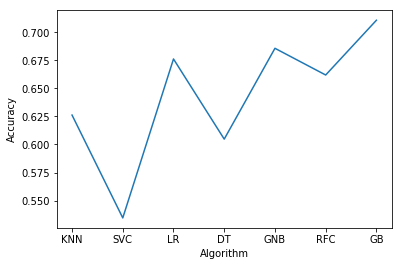

In [56]:
import matplotlib.pyplot as plt
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(names, score)